<a href="https://colab.research.google.com/github/nurfnick/Data_Viz/blob/main/Content/Data_Visualization/AdvancedTechniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Graphing Techniques

The sky is the limit from here on what you can do with graphs. With some combination of `matplotlib`, `seaborn` and `plotly`, you could recreate any visualization you see on the web (with the right data and patience of course!)  Presented below are a few of the more useful techniques I have used.

## Subplots

Often it is desired to have multiple graphs in the same image.  This can be achieved (and modified!) with the `subplot` command.  Let's see it in action!

In [1]:
import matplotlib.pyplot as plt
import pandas as pa

df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Viz/main/Data_Sets/Activity_Dataset_V1.csv')
df.head()

,Unnamed: 0,activity_day,workout_type,distance,time,calories,total_steps,avg_speed,avg_cadence,max_cadence,...,max_pace,min_pace,avg_heart_rate,max_heart_rate,min_heart_rate,vo2_max(%),aerobic(%),anaerobic(%),intensive(%),light(%)
0,0,2022-01-01,Freestyle,9.30,77,123,NaN,18.88,168.54,138.30,...,NaN,NaN,112.5,122.0,103,19,28,2,7,50
1,1,2022-01-01,Freestyle,3.44,96,55,NaN,29.65,125.92,292.81,...,NaN,NaN,111.0,122.0,100,42,28,2,29,88
2,2,2022-01-01,Indoor Cycling,6.34,85,33,NaN,17.85,81.93,323.69,...,NaN,NaN,95.0,90.0,100,1,32,0,22,43
3,3,2022-01-01,Walking,7.91,42,82,1571.0,22.10,29.63,180.16,...,28:58,07:58,83.0,85.0,81,3,22,0,24,65
4,4,2022-01-01,Open Water,8.99,36,131,NaN,25.83,64.55,342.89,...,NaN,NaN,138.0,166.0,110,7,0,5,21,88


If we wanted two scatterplots of distance compared to time and then again compared to calories, we'll do that with our subplot!  I want them both to have distance on the y-axis.  This means I want one row and 2 columns for my subplot.  Then I assign `ax[0]` the first graph and `ax[1]` the second graph.

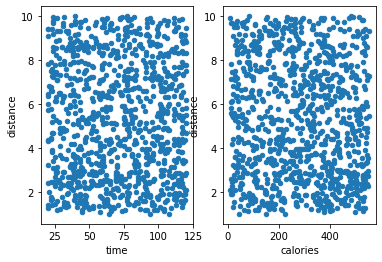

In [ ]:
fig, ax = plt.subplots(1,2)

df.plot.scatter('time','distance',ax = ax[0])
df.plot.scatter('calories','distance',ax = ax[1])

plt.show()

If we wanted them to be vertical, the assignment only requires one arguement in `subplots`.  I changed the $x$ variable to distance to make the visualization coherent.

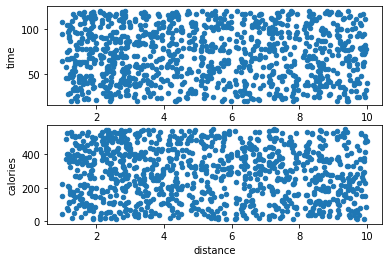

In [ ]:
fig, ax = plt.subplots(2)

df.plot.scatter('distance','time',ax = ax[0])
df.plot.scatter('distance','calories',ax = ax[1])

plt.show()

All of the other options are still available!  You'll just need to be sure you are calling the graph you want to make changes to.  You can also make changes to the entire figure via the `fig` portion generated via the original subplot call.

## Sizing the Image

The size of the image can be changed by calling options on the `fig`.

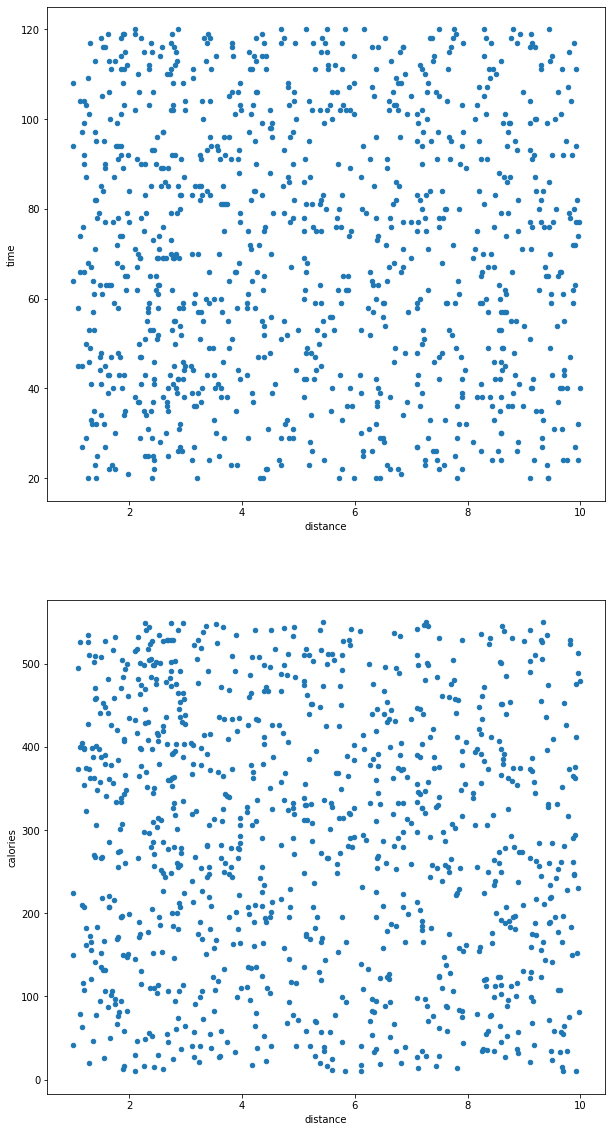

In [ ]:
fig, ax = plt.subplots(2)

fig.set_figheight(20)
fig.set_figwidth(10)

df.plot.scatter('distance','time',ax = ax[0])
df.plot.scatter('distance','calories',ax = ax[1])


plt.show()

## Scales and Markers

You can change the scales in many different ways with matplotlib.

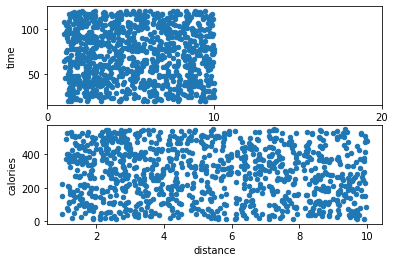

In [ ]:
fig, ax = plt.subplots(2)

df.plot.scatter('distance','time',ax = ax[0])
df.plot.scatter('distance','calories',ax = ax[1])

ax[0].set(xlim = [0,20]) #set the limit on the first to go from 0 to 20
ax[0].set(xticks = [0,10,20]) #only have a few tick marks

plt.show()

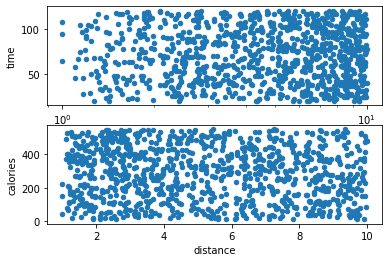

In [ ]:
fig, ax = plt.subplots(2)

df.plot.scatter('distance','time',ax = ax[0])
df.plot.scatter('distance','calories',ax = ax[1])

ax[0].set(xscale = 'log') #set a logarithmic scale

plt.show()

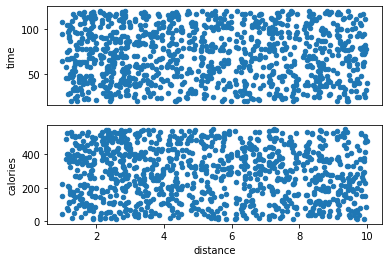

In [ ]:
fig, ax = plt.subplots(2)

df.plot.scatter('distance','time',ax = ax[0])
df.plot.scatter('distance','calories',ax = ax[1])

ax[0].tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[0].set(xlabel = "") #gets rid of the label too

plt.show()

## Adding Images

Often excellent visualizations will use logos rather than colors and a legend to signify what category a graphic belongs to.  Here I load a graphic from the web and add it to a blank graph.

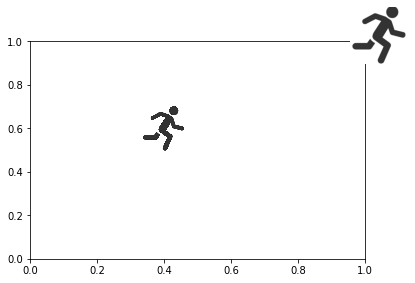

In [4]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

fig, ax = plt.subplots()

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

runningman = plt.imread('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJ7fNahZKtNh95Fut4lEPabxqIXwSbwVJ-vSs7bTEfO_uZpZKlRbAlakwhMKvdIr7uIUY&usqp=CAU')


newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='NE', zorder=1) #puts him in the corner
newax.imshow(runningman)
newax.axis('off')


imagebox = OffsetImage(runningman, zoom=0.2)
ab = AnnotationBbox(imagebox, (0.4, 0.6), frameon = False) #puts him on the graph where it will correspond to your data!
ax.add_artist(ab)

plt.draw()
plt.show()

Rarely are you going to just add a graphic to a blank graphic.  You are going to try to make it highlight your data!

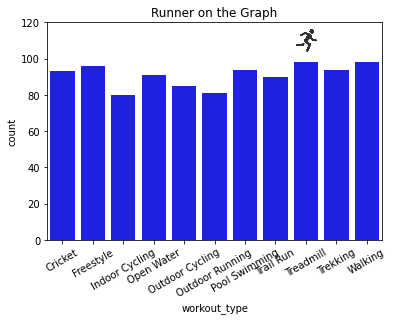

In [5]:
import seaborn as sns

df1 = df.groupby('workout_type').workout_type.agg(count = 'count') #manipulate the data
df1 = df1.reset_index()

ax = sns.barplot(data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Runner on the Graph')
ax.set(ylim = [0,120]) # I moved the top up to give hime some room!


imagebox = OffsetImage(runningman, zoom=.1)
ab = AnnotationBbox(imagebox, (8, 110), frameon = False) #the numbers here are from the center of the graphic!
ax.add_artist(ab)

plt.show()

## Annotate

You can add context directly to your graphic by using the `annotate` command.  We have even added an arrow here rather easily but most of the time you shouldn't need the arrow!

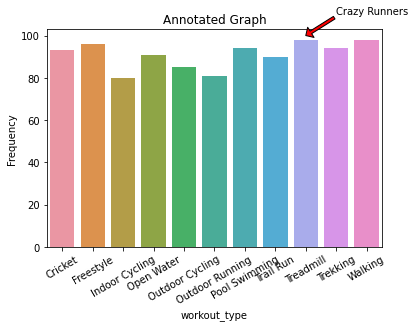

In [ ]:
ax = sns.barplot( x= df.groupby('workout_type').workout_type.agg('count').index, y = df.groupby('workout_type').workout_type.agg('count'))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.annotate("Crazy Runners",
            xy = [8,100],
            xytext = [9,110],
            arrowprops = dict(facecolor = 'red', width = 3, headwidth = 12, headlength = 6))
ax.set_title('Annotated Graph')
ax.set_ylabel('Frequency')

plt.show()


## Colors

You can access the seaborn colors with the following code.

In [ ]:
sns.color_palette('bright')

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

There are many options; deep, muted, pastel, bright, dark, and colorblind.

In [ ]:
sns.color_palette('deep')

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [ ]:
sns.color_palette('colorblind')

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [ ]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

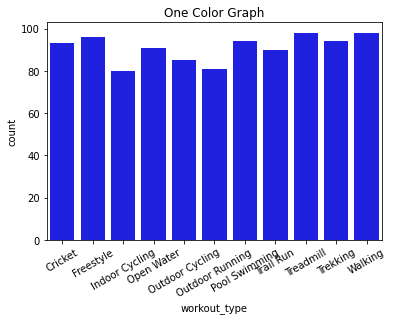

In [ ]:

ax = sns.barplot(data = df1,x = 'workout_type', y = 'count', color = 'blue')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('One Color Graph')

plt.show()

I was not able to get the following code to work in a Jupyter notebook setting!

In [ ]:
sns.set_palette('bright')

Instead I placed the color directly in the graphics command.

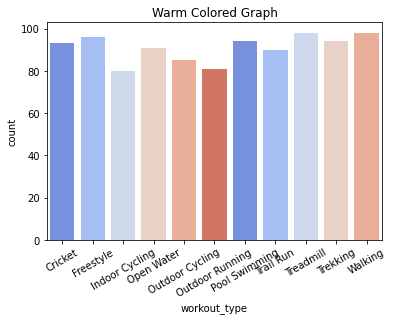

In [ ]:
ax = sns.barplot(data = df1,
                 x = 'workout_type', 
                 y = 'count',
                 palette=sns.color_palette('coolwarm', n_colors= 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
ax.set_title('Warm Colored Graph')

plt.show()

## Text Boxes

Outside of the annotate, we may want to put a reference for our data.  This can be achieved.

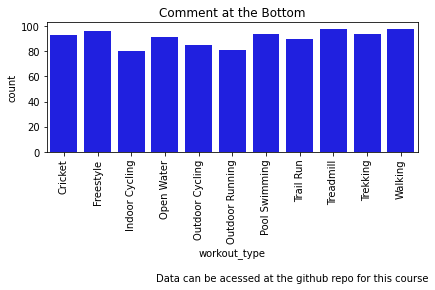

In [ ]:
fig, ax = plt.subplots()

ax = sns.barplot(data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Comment at the Bottom')

text = fig.text(1, .01, 
    'Data can be acessed at the github repo for this course', 
    horizontalalignment='right', 
    wrap=True,
    url = 'https://github.com/nurfnick/Data_Viz' ) 
fig.tight_layout(rect=(0,.05,1,1)) 

I think for the url to be active you must export the image.

It is possible to attach the text to a subplot?

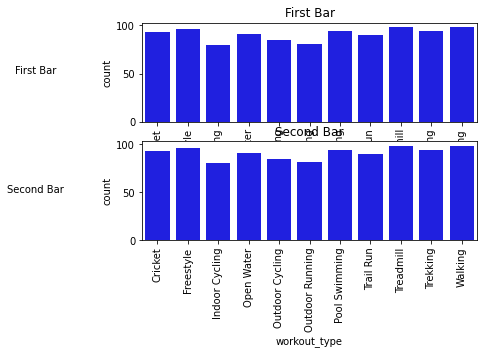

In [ ]:
fig, ax = plt.subplots(2)

sns.barplot(ax = ax[0], data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
ax[0].set_title('First Bar')

text = ax[0].text(-4, 50, #references here are to the graphic generated!
    'First Bar', 
    horizontalalignment='center')


sns.barplot(ax = ax[1],data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
ax[1].set_title('Second Bar')

text = ax[1].text(-4, 50, #references here are to the graphic generated!
    'Second Bar', 
    horizontalalignment='center')

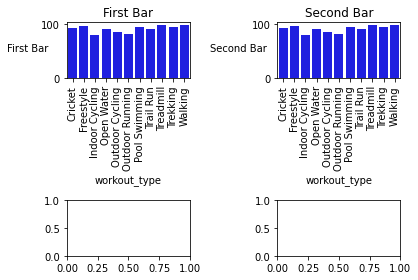

In [10]:
fig, ax = plt.subplots(2,2)

sns.barplot(ax = ax[0,0], data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation = 90)
ax[0,0].set_title('First Bar')
ax[0,0].set(ylabel = "")
text = ax[0,0].text(-4, 50, #references here are to the graphic generated!
    'First Bar', 
    horizontalalignment='center')


sns.barplot(ax = ax[0,1],data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation = 90)
ax[0,1].set_title('Second Bar')
ax[0,1].set(ylabel = "")

text = ax[0,1].text(-4, 50, #references here are to the graphic generated!
    'Second Bar', 
    horizontalalignment='center')

fig.tight_layout()

## Background Coloring

You can change the `facecolor` of the images.

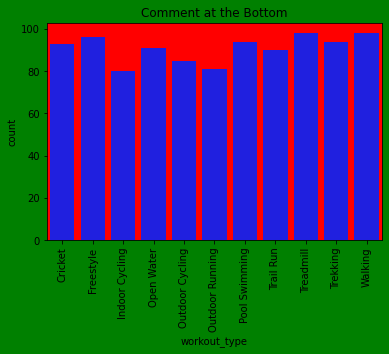

In [ ]:
fig, ax = plt.subplots()

ax = sns.barplot(data = df1,x = 'workout_type', y = 'count', color = 'blue') #create the bar chart
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_title('Comment at the Bottom')

fig.set(facecolor = 'green')
ax.set_facecolor('red')

Of course I made some horrible color decisisons here...  Here are all the named colors from matplotlib's docs.

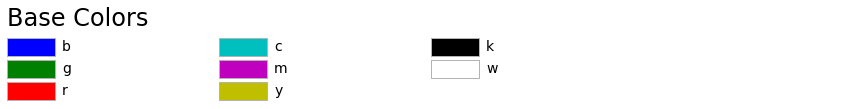

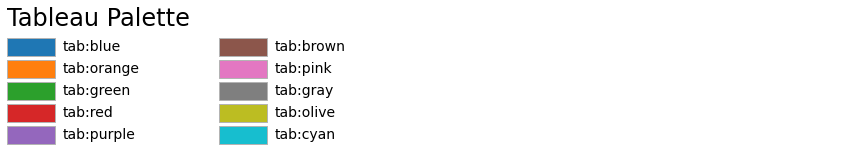

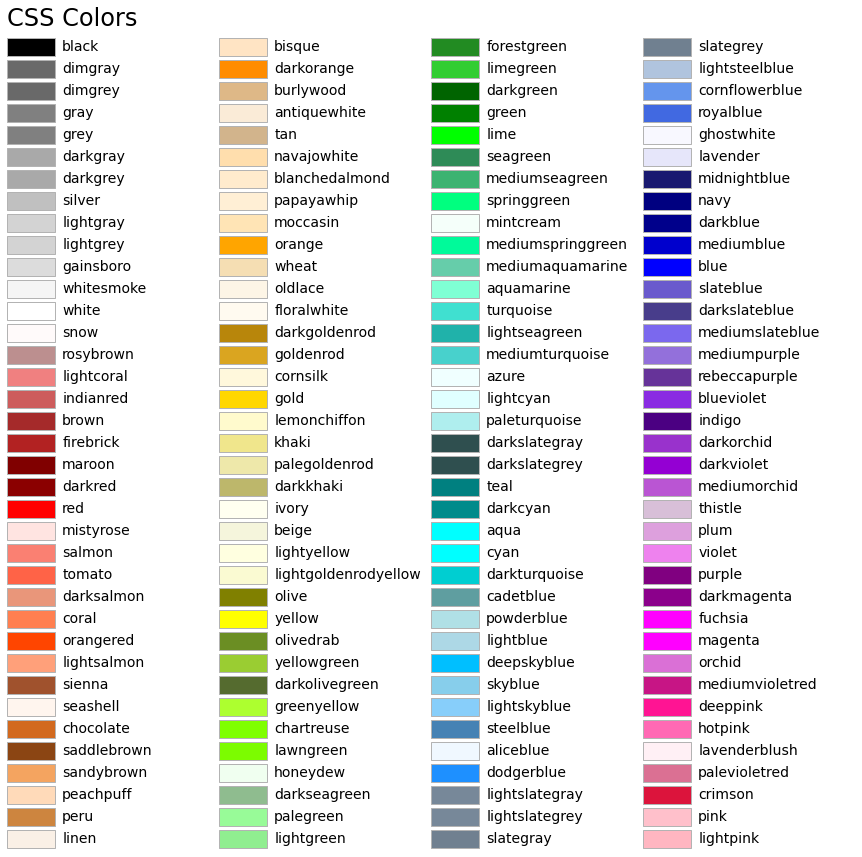

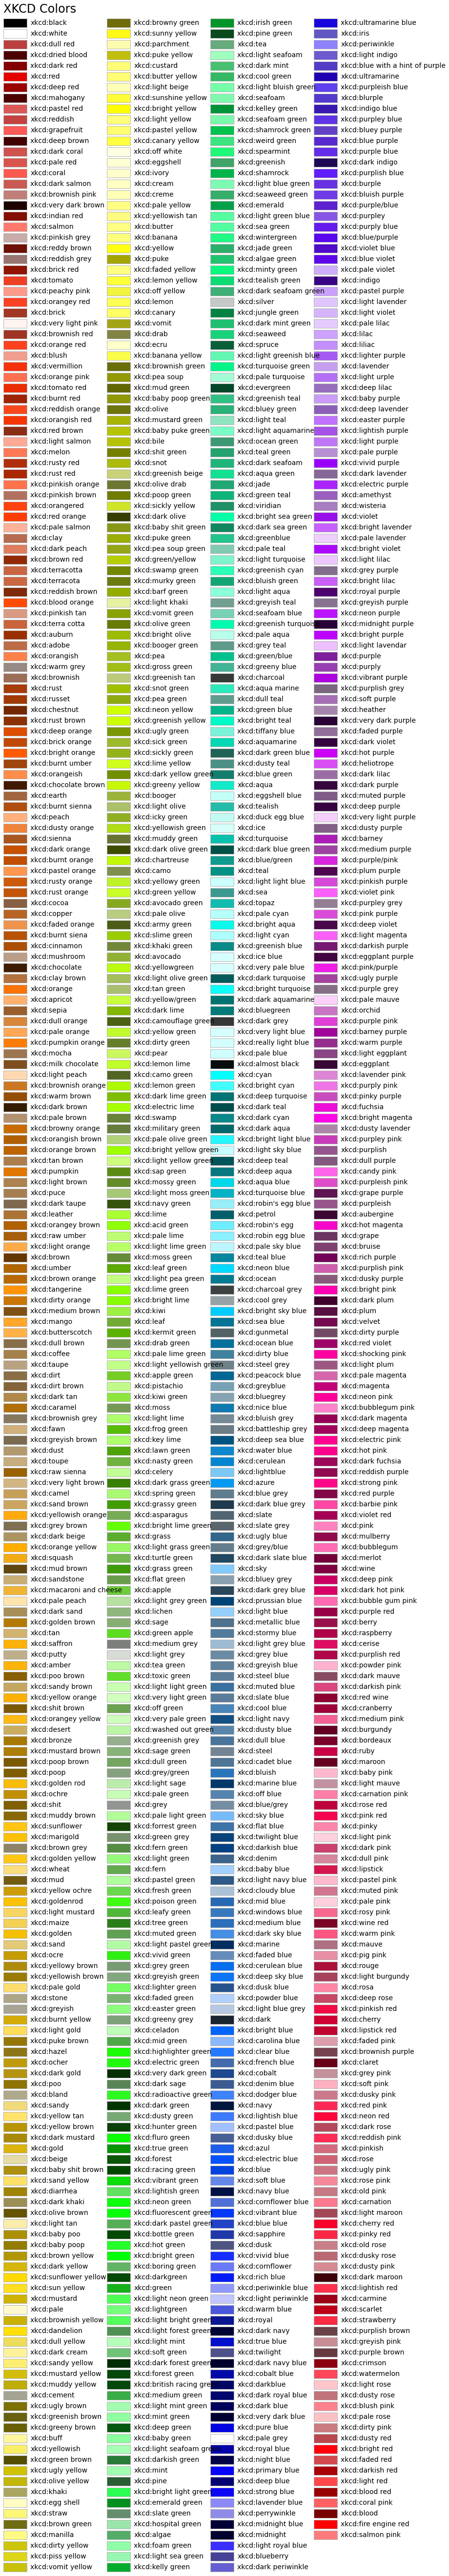

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

## Your Turn

Using the iris data, create a scatterplot comparing the sepal length verus the width.  Attach the image of the iris somewhere on your graphic where it does not interfere with the data.

![iris](https://cdn-icons-png.flaticon.com/512/4139/4139394.png)

Use different colors for different types of irises.  Include a textbox on the graphic with your comments about the visualization.